### **PH421 Project Team 7 - Third Order Optical nonlinearity of three dimensional massless Dirac Fermions**

This executable paper is based on the work described in [1]. We present analytic expressions for the electronic contributions to the linear conductivity
and the third order optical conductivity of three dimensional massless Dirac
fermions and discuss the symmetry properties associated with these terms. We start from the basics and derivations of 2D Dirac Fermions and try to apply these principles for the three dimensional case. Apart from reproducing the results of the paper, we have also added some concept clearing topics to improve the overall understanding of the paper

**Individual Contributions -** 


Vineet Bhat (180260042) - Introduction and Symmetrical Properties of conductivities of 2D Dirac Fermions

Anish Chaurasiya (180260007) - Conductivities of 3D Dirac Fermions and Designing the Endsem Problem 

Benhur (180260016) - Conductivities of Different Optical Phenomena - general properties, linear optical response, third harmonic generation,Kerr effect and two photon absorption

Auro Soni (180260010) - Conductivities of Different Optical Phenomena - parametric frequency conversion, Two-color coherent current injection and Conclusion

Our 1 hour explanation video can be found in this folder - https://drive.google.com/drive/folders/1UKkhpAJENfBLVVaAn-QK0SOraJOL0SKq?usp=sharing

In [ ]:
 # Install all dependencies needed to run this executable paper
!pip install pythtb --upgrade

#For reference to this python package, please check [2]

     |████████████████████████████████| 81kB 3.1MB/s 
  Created wheel for pythtb: filename=pythtb-1.7.2-cp36-none-any.whl size=39978 sha256=439fa338848e5e25bdca889b32add3d0d9723a8a2f2df577f88eebc9f0bc4569
  Stored in directory: /root/.cache/pip/wheels/ae/92/49/9cb2ba236bb90292805fff0fd8cde26443eadb99ec69b06ba5
Successfully built pythtb


## **Introduction**

Graphene is an allotrope of carbon consisting of a single layer of atoms arranged in a two-dimensional honeycomb lattice. Each atom in a graphene sheet is connected to its three nearest neighbors by a σ-bond, and contributes one electron to a conduction band that extends over the whole sheet. The structural flexibility of graphene is related in its electronic properties. One of the most interesting aspects of the graphene problem is that its low energy excitations are massless, chiral, Dirac fermions.

**Band structures**: representation of the allowed electronic energy levels of solid materials that are used to
better inform their electrical properties. A band structure is a 2D representation of the energies of the crystal
orbitals in a crystalline material.A band structure plot can
quickly reveal whether a material is metallic, semi-metallic, or insulating, and for those materials with band
gaps whether they are direct or indirect as well as the magnitude of the gap. Additionally, the curvature of
the bands can reflect the carrier mobility through those bands. 

Run the next code cell to look at the 2D structure of graphene and the graph for graphene's 2D band structure

 Path in 1D BZ defined by nodes at [0.  0.5 1. ]

Plotting bandstructure...
Done.



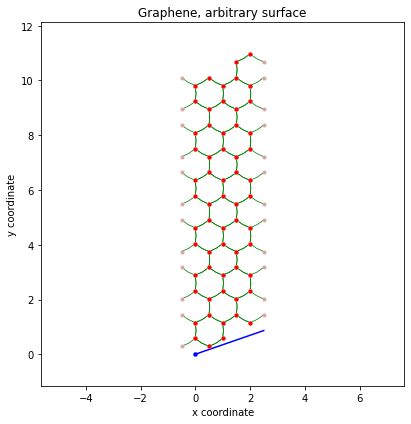

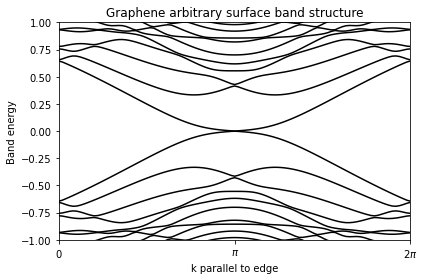

In [ ]:
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding graphene model
my_model=tb_model(2,2,lat,orb)

# set model parameters
delta=0.0
t=-1.0

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])

# make the supercell of the model
sc_model=my_model.make_supercell([[2,1],[-1,2]],to_home=True)

# now make a slab of the supercell
slab_model=sc_model.cut_piece(6,1,glue_edgs=False)

# visualize slab unit cell
(fig,ax)=slab_model.visualize(0,1)
ax.set_title("Graphene, arbitrary surface")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()
fig.savefig("supercell_vis.pdf")

# compute the band structure in the entire band
(k_vec,k_dist,k_node)=slab_model.k_path('full',100)
evals=slab_model.solve_all(k_vec)

# plotting of band structure
print('Plotting bandstructure...')

# First make a figure object
fig, ax = plt.subplots()
# plot all bands
for i in range(evals.shape[0]):
    ax.plot(k_dist,evals[i],"k-")
# zoom in close to the zero energy
ax.set_xlim(k_dist[0],k_dist[-1])
ax.set_ylim(-1.0,1.0)
# put title on top
ax.set_title("Graphene arbitrary surface band structure")
ax.set_xlabel("k parallel to edge")
ax.set_ylabel("Band energy")
ax.xaxis.set_ticks(k_node)
ax.set_xticklabels((r'$0$',r'$\pi$',r'$2\pi$'))
# make an PDF figure of a plot
fig.tight_layout()
fig.savefig("supercell_band.pdf")

print('Done.\n')

In the above diagram we can see that at k = $\pi$, the valence bands(below) touch the conduction bands(above). This point is called as *Dirac point*. 

The Dirac point is a unique feature of graphene’s band structure. Unlike the band structure of semiconductors, for example, graphene has no band gap – no gap in energy between the electron-filled valence band and the unoccupied conduction band. In graphene these bands are represented by two cones (“Dirac cones”) whose points touch, crossing linearly at the Dirac point.

Graphene nanoribbons are unique in achieving single-dimensional gapless dispersions. In graphene, the touching of the conduction and valence bands at some points, makes it a gapless semiconductor where the state density vanishes at the Fermi level. As a result, the electron speed is 0.0025 times the speed of light. This is greater than that achieved in any conventional semiconductor.

The bandgap at the K-points of undoped graphene is zero and the conduction and valence bands have conical form with the tips of the cones touching at the Fermi energy(energy at Dirac point).  The density of states is zero because the cones touch at an infinitely small point that has no 'range' or 'extent' in E-k space. i.e. there are no states at this point and hence the density of states is zero.  The effective mass of the carriers is inversely proportional to the curvature of the E-k surface.  Since the curvature at a sharp point is infinite the effective mass is zero at the tip of the cones.

The remarkable transport properties of graphene, such as the high electron mobility, make it a promising material for electronics. However, unlike semiconductors such as silicon, graphene's electronic structure lacks a band gap, and a transistor made out of graphene would not have an “off” state.



---






A Dirac Fermion is a spin 1/2 particle which is different from its antiparticle. Such particles can be modelled by the dirac equation given by [3]-

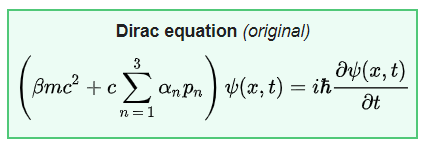

where ψ = ψ(x, t) is the wave function for the particle of rest mass m with spacetime coordinates x, t. The $p_1, p_2, p_3$ are the components of the momentum, understood to be the momentum operator in the Schrödinger equation. Also, c is the speed of light, and ħ is the reduced Planck constant. 






Some of the most important optical properties of 2D massless Dirac fermions found in graphene are - 


1.   Broadband Linear Optical absorption 
2.   Ability to use the chemical potential to tune both plasmon resonances
3.   Extremely strong nonlinear optical response

The third property makes graphene a strong candidate for integration in photonic devices. 

There have also been a lot of recent studies on the discovery of 3D Dirac semimetals where the low energy excitation of the dirac fermions can be represented by a 3 dimensional wave vector. They possess gapless linear dispersion and an interesting band topology around the 
Dirac point which leads to excellent optical properties.

---








### **Conductivities for 2D Dirac Fermions**

Before we move on to the calculations for 2D dirac fermions, let us take a moment to understand some important terms with respect to dirac fermions

Berry phase is the phase picked up by the wave function after traversing a loop in the parameter space. Berry curvature Ω(k) is simply defined as the Berry phase per unit area in parameter space.

The code cell given below computes Berry phases for a circular path (in reduced coordinates) around the Dirac point of the graphene band structure. After computing the Berry phase around the circular loop, it also computes the integral of the Berry curvature over a small square patch containing the Dirac point, and plots individual phases for each plaquette in the array. 



---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>       0.1
 #  1  ===>      -0.1
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  0 ,  1 ] ) |  =    0.5774

Berry phase along circle with radius:  0.05
  centered at k-point:  [0.33333333

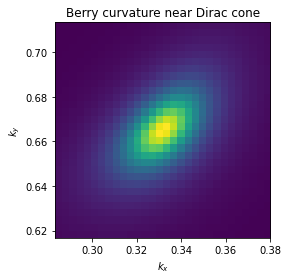

In [ ]:
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding graphene model
my_model=tb_model(2,2,lat,orb)

# set model parameters
delta=-0.1 # small staggered onsite term
t=-1.0

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])

# print tight-binding model
my_model.display()

# construct circular path around Dirac cone
#   parameters of the path
circ_step=31
circ_center=np.array([1.0/3.0,2.0/3.0])
circ_radius=0.05
# one-dimensional wf_array to store wavefunctions on the path
w_circ=wf_array(my_model,[circ_step])
# now populate array with wavefunctions
for i in range(circ_step):
    # construct k-point coordinate on the path
    ang=2.0*np.pi*float(i)/float(circ_step-1)
    kpt=np.array([np.cos(ang)*circ_radius,np.sin(ang)*circ_radius])
    kpt+=circ_center
    # find eigenvectors at this k-point
    (eval,evec)=my_model.solve_one(kpt,eig_vectors=True)
    # store eigenvector into wf_array object
    w_circ[i]=evec
# make sure that first and last points are the same
w_circ[-1]=w_circ[0]

# compute Berry phase along circular path
print("Berry phase along circle with radius: ",circ_radius)
print("  centered at k-point: ",circ_center)
print("  for band 0 equals    : ", w_circ.berry_phase([0],0))
print("  for band 1 equals    : ", w_circ.berry_phase([1],0))
print("  for both bands equals: ", w_circ.berry_phase([0,1],0))
print()

# construct two-dimensional square patch covering the Dirac cone
#  parameters of the patch
square_step=31
square_center=np.array([1.0/3.0,2.0/3.0])
square_length=0.1
# two-dimensional wf_array to store wavefunctions on the path
w_square=wf_array(my_model,[square_step,square_step])
all_kpt=np.zeros((square_step,square_step,2))
# now populate array with wavefunctions
for i in range(square_step):
    for j in range(square_step):
        # construct k-point on the square patch
        kpt=np.array([square_length*(-0.5+float(i)/float(square_step-1)),
                      square_length*(-0.5+float(j)/float(square_step-1))])
        kpt+=square_center
        # store k-points for plotting
        all_kpt[i,j,:]=kpt
        # find eigenvectors at this k-point
        (eval,evec)=my_model.solve_one(kpt,eig_vectors=True)
        # store eigenvector into wf_array object
        w_square[i,j]=evec

# compute Berry flux on this square patch
print("Berry flux on square patch with length: ",square_length)
print("  centered at k-point: ",square_center)
print("  for band 0 equals    : ", w_square.berry_flux([0]))
print("  for band 1 equals    : ", w_square.berry_flux([1]))
print("  for both bands equals: ", w_square.berry_flux([0,1]))
print()

# also plot Berry phase on each small plaquette of the mesh
plaq=w_square.berry_flux([0],individual_phases=True)
#
fig, ax = plt.subplots()
ax.imshow(plaq.T,origin="lower",
          extent=(all_kpt[0,0,0],all_kpt[-2, 0,0],
                  all_kpt[0,0,1],all_kpt[ 0,-2,1],))
ax.set_title("Berry curvature near Dirac cone")
ax.set_xlabel(r"$k_x$")
ax.set_ylabel(r"$k_y$")
fig.tight_layout()
fig.savefig("cone_phases.pdf")

print('Done.\n')

The hamiltonian for 2D massive Dirac fermions on a Dirac cone is given by (*Equation 1*) - 

$H_{2d}(k,\Delta) = \hbar v_f (k\cdot \sigma) + \Delta \sigma_{z}$


where $ v_F$ is the fermi velocity, $σ = (σ_x,σ_y,σ_z) $ has its components as the pauli matrices and k = $(k_x,k_y)$ is a two dimensional wave vector $\Delta$ is a mass parameter to give a gap 2$|\Delta|$ at the Dirac Point

The hamiltonian varies from material to material and can take different forms. For example, the low energy excitations of gapped graphene are described by the Hamiltonian - 

$H_{gg:\tau}(\textbf{k},\Delta) = \hbar v_{F}(\tau k_y \sigma_x - k_x \sigma_y) + \Delta \sigma_z$


where $\tau$ = 1 or -1 for two different Dirac cones ( also called Valley Index)

We are interested in studying the linear optical conductivity tensor $\sigma^{(1);da}(\omega)$ and the third order optical conductivity tensor $\sigma^{(3);dabc}(\omega_1,\omega_2,\omega_3)$ where d,a,b,c are the cartesian directions and $\omega$ and $\omega_i$ are the optical frequencies 

**Symmetrical properties of conductivities of 2D massive Dirac fermions**

The hamiltonian from equation 1 satisfies the rotational symmetry condition - 

$U_{\theta}H_{2d}(R_{\theta}k,\Delta)U_{\theta}^{T} = H_{2d}(k,\Delta)$



---


Proof:

From equation 1, we can write the matrix representation of the hamiltonian as - 

$H_{2d}(k,\Delta) = \begin{bmatrix} \Delta & \hbar v_f (k_x - ik_y)\\\hbar v_f (k_x + ik_y) & \Delta\\\end{bmatrix}\quad$

$R_{\theta}k = \begin{bmatrix} \cos\theta & \sin\theta\\ -sin\theta & \cos\theta\\\end{bmatrix}\cdot \begin{pmatrix} k_x \\ k_y \end{pmatrix}$ = $\begin{pmatrix} k_x \cos\theta + k_y \sin\theta\\ -k_x \sin\theta + k_y \cos\theta \end{pmatrix}$

$\therefore $ substituting this value of $R_{\theta}k $ in the hamiltonian matrix, we get - 

$H_{2d}(R_\theta k,\Delta) = \begin{bmatrix} \Delta & \hbar v_f e^{i\theta}(k_x - ik_y)\\\hbar v_f e^{-i\theta} (k_x + ik_y) & \Delta\\\end{bmatrix}\quad$

We know that $U_{\theta} = \cos(\theta/2) \cdot I - i\sin(\theta/2) \sigma_{z}$

Thus,  $U_{\theta} = \begin{bmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2}\\\end{bmatrix} $


$U_{\theta}H_{2d}(R_{\theta}k,\Delta)U_{\theta}^{T} = \begin{bmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2}\\\end{bmatrix} \cdot \begin{bmatrix} \Delta & \hbar v_f e^{i\theta}(k_x - ik_y)\\\hbar v_f e^{-i\theta} (k_x + ik_y) & \Delta\\\end{bmatrix} \cdot \begin{bmatrix} e^{i\theta/2} & 0 \\ 0 & e^{-i\theta/2}\\\end{bmatrix}$ 


$U_{\theta}H_{2d}(R_{\theta}k,\Delta)U_{\theta}^{T} = \begin{bmatrix} \Delta & \hbar v_f (k_x - ik_y)\\\hbar v_f (k_x + ik_y) & \Delta\\\end{bmatrix}\quad = H_{2d}(k,\Delta) $

***QED.***

---






The rotational symmetry implies that the linear conductivity includes only two independent components i.e. the diagonal component $\sigma_{2d}^{(1);xx}$ and the off-diagonal component $\sigma_{2d}^{(1);xy}$ 

Therefore, the other nonzero components can be found from 
$\sigma_{2d}^{(1);xx} = \sigma_{2d}^{(1);yy}$ and $\sigma_{2d}^{(1);xy} = -\sigma_{2d}^{(1);yx}$


Similarly for third order conductivity, 

$\sigma_{2d}^{(3);xxxx} = \sigma_{2d}^{(3);xxyy}+\sigma_{2d}^{(3);xyxy}+\sigma_{2d}^{(3);xyyx}$

$\sigma_{2d}^{(3);yxxx} = \sigma_{2d}^{(3);yxyy}+\sigma_{2d}^{(3);yyxy}+\sigma_{2d}^{(3);yyyx}$

and 

$\sigma_{2d}^{(3);xxxx} = \sigma_{2d}^{(3);yyyy}$ ; $\sigma_{2d}^{(3);xxyy} = \sigma_{2d}^{(3);yyxx}$ ; $\sigma_{2d}^{(3);xyxy} = \sigma_{2d}^{(3);yxyx}$ ; $\sigma_{2d}^{(3);xyyx} = \sigma_{2d}^{(3);yxxy}$

$\sigma_{2d}^{(3);yxxx} = -\sigma_{2d}^{(3);xyyy}$ ; $\sigma_{2d}^{(3);yxyy} = -\sigma_{2d}^{(3);xyxx}$ ; $\sigma_{2d}^{(3);yyxy} = -\sigma_{2d}^{(3);xxyx}$ ; $\sigma_{2d}^{(3);yyyx} = -\sigma_{2d}^{(3);xxxy}$

Thus for a single dirac cone, there are two different classes of components in the optical conductivity - symmetric and antisymmetric depending on the change in the sign of the components due $x \leftrightarrow y$ transformation

For 2D Dirac fermions, the sign of the mass parameter decides the chirality. These two configurations are connected by - 

$U_{\theta}H_{2d}(R_{m}k,\Delta)U_{\theta}^{T} = H_{2d}(k,-\Delta)$

where $U_m = (i/\sqrt(2))(\sigma_x - \sigma_y)$ and $R_m = \begin{bmatrix} 0 & -1 \\-1 & 0\\\end{bmatrix}$

This implies $\sigma_{2d}^{(n);dab..}(-\Delta) = \sigma_{2d}^{(n);\bar d\bar a..}(\Delta) $ where $\bar d$ = y,x for d = x,y

---




### **Conductivies of gapped graphene**

Graphene, being a gapless semiconductor, cannot be used in pristine form for nano-electronic applications. Therefore, it is essential to generate a finite gap in the energy dispersion at Dirac point. Although the tight-binding Dirac cone band structure suggests no, interactions and other effects have been predicted to open up a gap

In the previous section we saw that there are two Dirac cones possible because of the sign of the mass parameter. This chiral behaviour will be incorporated in our discussion using the variable $\tau$. Let the hamiltonian of gapped graphene be denoted by $H_{gg;\tau}$ and the corresponding conductivities by $\sigma_{gg;\tau}^{(1);dabc}(\omega)$ and $\sigma_{gg;\tau}^{(3);dabc}(\omega_1,\omega_2,\omega_3)$

$H_{gg;\tau}(k,\Delta) = H_{gg;\tau}(R_{\tau}k,\Delta)$

where $R_\tau = \begin{bmatrix} 0 & \tau \\-1 & 0\\\end{bmatrix}$ 

Symmetric components: $\sigma_{gg;\tau}^{(n);da...}(\Delta) = \sigma_{2d}^{(n);\bar d \bar a...} (\Delta)$

Antisymmetric components: $\sigma_{gg;\tau}^{(n);da...}(\Delta) = \tau \sigma_{2d}^{(n);\bar d \bar a...}(\Delta) $

Thus only the symmetric components are non zero. 

$ \therefore \sigma_{gg}^{(1);xx}(\omega) = 2 \Sigma_\tau \sigma_{gg;\tau}^{(1);xx}(w) = 4\sigma_{2d}^{(1);xx}(\omega)$

The extra factor of 2 occurs due to spin degeneracy in gapped graphene. Similar arguments can be made for third order degeneracies



We borrow the formulae derived in [4] for linear dispersion approximation of optical conductivities of gapped graphene.

The linear conductivity for gapped graphene is given by:

$\sigma_{gg}^{(1);xx}(\omega) = \frac{i\sigma_0}{\pi}[\frac{4E_c}{\hbar \omega} - \frac{(4\Delta^2 + (\hbar\omega)^2)G(E_c;\hbar\omega)}{(\hbar\omega)^2}]$

Here, $\sigma_0 = \frac{e^2}{4\hbar}$ and $E_c = max({|\Delta|,|\mu|})$ = effective gap parameter and 

$G(E_c;\hbar\omega) = \ln(|\frac{\hbar\omega + 2E_c}{\hbar\omega - 2E_c}|) + i\pi\theta(|\hbar\omega| - 2E_c)$

where $\theta(x)$ is the step function

*Explaination*: 

-Now we know the symmetry properties of the conductivities for 2D DF in one Dirac cone

-assuming that we have the analytic expression of the conductivities for 2D gapped graphene 

-Now we are good to go for finding optical response of 3D massless DF

-we will look for isotropic 3D Dirac cone 

-Hamiltonian for 3D massless DFs in a single isotropic Dirac cone given by

$H_{3d}= \hbar v_F k. \sigma $ 

-where $k=k_x \hat{x}+k_y \hat{y}+k_z \hat{z}$ is a three dimensional wave vector

-The two band energies are  $\varepsilon = \pm \hbar v_F|k|$, where touch at $k=0$, the Dirac point.


<function matplotlib.pyplot.show>

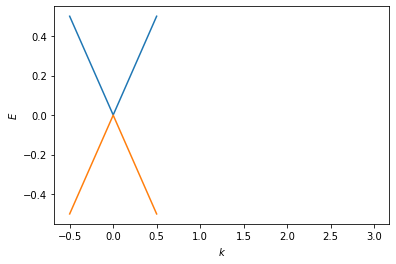

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
wave_vec=np.linspace(-0.5,0.5,1000)
energy=abs(wave_vec)
neg_energy=-abs(wave_vec)
plt.plot(wave_vec,energy,wave_vec,neg_energy)
plt.fill_between(3,energy)
plt.xlabel('$k$')
plt.ylabel('$E$')
plt.show


*Explaination*:.

-Denoting $\sigma_{3d}^{(1);da}(\omega)$ and $\sigma_{3d}^{(3);dabc}(\omega_1,\omega_2,\omega_3)$ , the linear and nonlinear conductivity of 3d DF in an isotropic Dirac cone. where d,a,b,c are just the cartesian axes.

-From the Hamiltonian equation you can see that it is spherically symmetric

-from this we conclude that the only independent non zero componenet of linear conductivity is 

 $\sigma_{3d}^{(1);xx}(\omega)$

-and for the third order conductivity, the non zero components are the symmetric ones 

$\sigma_{3d}^{(1);xxyy},\sigma_{3d}^{(1);xyxy}, $ and $ \sigma_{3d}^{(1);xyyx}$

-All other components can be obtained either by

$\sigma_{3d}^{(1);xxxx}=\sigma_{3d}^{(1);xxyy}+\sigma_{3d}^{(1);xyxy}+\sigma_{3d}^{(1);xyyx}$,

or by permutation of the directions {$x,y,z$}. Due to the cyclic permutation on {$a\omega_1,b\omega_2,c\omega_3$} of $\sigma_{3d}^{(1);dabc}(\omega_1,\omega_2,\omega_3),$ and all nonzero component can be written in terms of 

 $\sigma_{3d}^{(1);xxyy}(\omega_1,\omega_2,\omega_3),$ which we will see now.





-The Hamiltonian for 3D massless DFs is connected to that of 2D DFs through the relation 

$H_{3d}(\kappa +\Delta/(\hbar v_F)\hat{z})=H_{2d}(\kappa,\Delta).$ 

-In the independent particle approximation, the full response arises as the sum of the response of each independent particles

-The response of 3D massless DFs to electric fields in the $x$ and $y$ directions is equivalent to an ensemble of responses of 2D massive DFs with different gap parameters. 

-In this manner the linear conductivity can be written as 

$\sigma_{3d}^{(1);xx} =\int \frac{dk_z}{2\pi}\sigma_{2d}^{(1);xx}(\hbar v_Fk_z)=\frac{1}{\pi \hbar v_F}\int_0^{\infty}d\Delta \sigma_{2d}^{(1);xx}(\Delta)$

where we have used $\sigma_{2d}^{(1);xx}(\Delta)=\sigma_{2d}^{(1);xx}(-\Delta)$ 

$\frac{1}{\pi \hbar v_F}\int_0^{\infty}d\Delta \sigma_{2d}^{(1);xx}(\Delta)=\frac{1}{4\pi \hbar v_F}\int_0^{\infty}d\Delta \sigma_{gg}^{(1);xx}(\Delta), $

using relation $\sigma_{gg}^{(1);xx}(\omega)=4\sigma_{2d}^{(1);xx}(\omega)$


for the second equal sign and Eq. (14) for the third equal sign. Similarly we have 

$\sigma_{3d}^{(3);xxyy}=\frac{1}{4\pi \hbar v_F}\int_0^{\infty}d\Delta \sigma_{gg}^{(3);xxyy}(\Delta).$

-All other nonvanishing components of the conductivities for 3D massless DFs follow from the symmetry properties of those tensors.

-Using the results for the conductivity of gapped graphene the integration can be done analytically

-The linear conductivity for gapped graphene is given by:

$\sigma_{gg}^{(1);xx}(\omega) = \frac{i\sigma_0}{\pi}[\frac{4E_c}{\hbar \omega} - \frac{(4\Delta^2 + (\hbar\omega)^2)G(E_c;\hbar\omega}{(\hbar\omega)^2}]$

Here, $\sigma_0 = \frac{e^2}{4\hbar}$ and $E_c = max({|\Delta|,|\mu|})$ = effective gap parameter and 

$G(E_c;\hbar\omega) = \ln(|\frac{\hbar\omega + 2E_c}{\hbar\omega - 2E_c}|) + i\pi\theta(|\hbar\omega| - 2E_c)$

where $\theta(x)$ is the step function


As $\Delta \rightarrow \infty$,  $E_c = \Delta$,  $\hbar\omega_i/E_c\rightarrow \infty$ 

$\sigma_{gg}^{(1);xx}(\omega) \rightarrow-\iota\sigma_0\frac{4\hbar\omega }{3\pi\Delta}$

$\sigma_{gg}^{(3);xxyy}(\omega_1,\omega_2,\omega_3) \rightarrow-\iota\sigma_3\frac{2\hbar(\omega_1+\omega_2+\omega_3) }{45\Delta^5}$






 $\sigma_{gg}^{(1);xx}\propto \Delta^{-1}$ 
Diverges; this is associated with the assumption
that the linear dispersion relation continues for all $k$, no matter how large. Taking a cut-off energy $E_A$ as the upper limit of the integration, to have more realistic band dispersion

The linear conductivity of three dimensional Dirac fermions in one cone is

$\sigma_{3d}^{(1);xx}(\omega )=\sigma_{3d,reg}^{(1);xx}(\omega )-\frac{\iota e^2 \hbar \omega}{12\pi^2\hbar^2 v_F}ln \frac{2E_A}{|\mu|}$,

$\sigma_{3d,reg}^{(1);xx}(\omega )=\frac{\iota e^2 }{24\pi\hbar^2 v_F} \frac{12|\mu|^2-5(\hbar\omega)^2+3(\hbar\omega)^2 Z(|\mu|;\hbar \omega)}{3\pi\hbar\omega}$,

where the function $Z$ is given by 

$Z(|\mu|;\omega)=ln|\omega^2-4\mu^2|-ln\mu^2-\iota\pi sgn(\omega)\theta(|\omega|-2|\mu|)$

$\hspace{2cm}= T(\frac{\omega}{|\mu|}),$ 

where

$T(x)=ln|x^2-4|-\iota \pi sgn(x)\theta(x-2),$


<function matplotlib.pyplot.show>

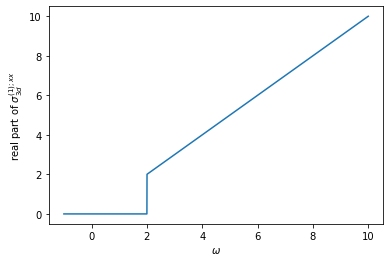

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-1,10,10000)
y_real=x*np.sign(x)*np.heaviside(x-2,0)
plt.plot(x,y_real)
plt.xlabel('$\omega$')
plt.ylabel('real part of $\sigma_{3d}^{(1);xx}$')
plt.show

<function matplotlib.pyplot.show>

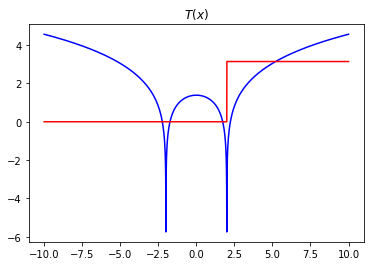

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-10,10,10000)
y_real=np.log(abs(x**2-4))
y_imag=np.pi*np.sign(x)*np.heaviside(x-2,0)
plt.plot(x,y_real,color='b')
plt.plot(x,y_imag,color='r')
plt.title('$T(x)$')
plt.show

 EA is not an cut-off energy for the energies of the DFs, but rather for the gap parameter

-Our result for the real part of the conductivity, which is physically meaningful was consitent with earlier result.

For the third order conductivity, the integration converges due to $\sigma^{(3);xxyy} \propto \Delta^{-5}$ in Eq. (23), and the conductivity of 3D Dirac fermions is

$\sigma_{3d}^{(3);xxyy}(\omega_1,\omega_2,\omega_3)= \frac{\iota v_{F}e^4}{16\pi^2} \{ \frac{8}{45\hbar^3\omega_1\omega_2\omega_3} +
$

$C_1(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)Z(|\mu|;\hbar(\omega_1+\omega_2+\omega_3))$
$+C_2(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)Z(|\mu|;\hbar(\omega_2+\omega_3))$

$+C_3(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)Z(|\mu|;\hbar(\omega_1+\omega_3))$

$+C_3(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)Z(|\mu|;\hbar(\omega_1+\omega_2))$

$+C_4(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)Z(|\mu|;\hbar\omega_1)$

$+C_5(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)Z(|\mu|;\hbar(\omega_2)\} $

where $C_i$ is given by

$C_i(\hbar\omega_l,\hbar\omega_m,\hbar\omega_n)Z(|\mu|;\hbar\omega)=[\sum_{j=0,2,4} F_{ij}(\hbar\omega_l,\hbar\omega_m,\hbar\omega_n)\frac{(-\hbar\omega)^{j+1}}{2^{j+1}}\frac{1}{j+1}]Z(|\mu|;\hbar\omega) .$

Note that the coefficients $C_i$ in $\sigma_{3d}^{(3);xxyy}$ satisfy

$C_1(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)+
C_2(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)+
C_3(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)+
C_3(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)+
C_4(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)+
C_5(\hbar\omega_1,\hbar\omega_2,\hbar\omega_3)=0.$



---



### **CONDUCTIVITIES FOR DIFFERENT OPTICAL PHENOMENA**

In this section we will see behaviour of third order conductivities of three dimensional massless dirac fermions calculated above in different optical phenomena.The current density respones in case of 3D massless Dirac fermions is
$$J(t)=\int \frac {e^{-iwt}E_{w}\sigma^{(1);xx}_{w}}{2\pi}dw + \int \frac{e^{-i(w_{1}+w_{2}+w_{3})}[\sigma^{(3);xxyy}_{3d}(w_{1},w_{2},w_{3})E_{w_{1}}(E_{w_{2}}E_{w_{3}})+\sigma^{(3);xyxy}_{3d}(w_{1},w_{2},w_{3})E_{w_{2}}(E_{w_{3}}E_{w_{1}})+\sigma^{(3);xyyx}_{3d}(w_{1},w_{2},w_{3})E_{w_{3}}(E_{w_{1}}E_{w_{2}})]}{(2\pi)^{3}}dw_{1}dw_{2}dw_{3}$$
where as $ E_{w}=\int E(t)e^{iwt}dt$ is the fourier transform of the electric field. Behaviour of this response in different optical phenomena is discussed below.

**Several general properties of the conductivities**

The third order conductivity of 3D massless Dirac Fermions behaves similarly to that of graphene.
1. Just like the non linear response of graphene the third order conductivity of 3D massless dirac fermions involve photon energies $\hbar w_{i},\hbar(w_{i}+w_{j}),\hbar(w_{1}+w_{2}+w_{3})$.When any of these energies equals $2|\mu|$, a resonant interband transition appear and when any one them is zero, an intraband divergence appear and lead to a divergent conductivity value in the clean limit at zero temperature.
2. The third order conductivity after scaling energies y the chemical potential is
$$\sigma^{(3);dabc}_{3d}(|\mu|;w_{1},w_{2},w_{3})= \frac{v_{F}e^{4}}{16\pi^{2}|\mu|^{3}}S^{(3);dabc}_{3d}(\frac{\hbar w_{1}}{|\mu|},\frac{\hbar w_{2}}{|\mu|},\frac{\hbar w_{3}}{|\mu|})$$
where as $v_{F}$ is fermi velocity and $\mu$ is chemical potential.
To better undertsand this we can compare it to that of graphene
$$\sigma^{(3);dabc}_{gh;eff}(|\mu|;w_{1},w_{2},w_{3})= \frac{\hbar v_{F}^{2}e^{4}}{4\pi d_{eff}|\mu|^{4}}S^{(3);dabc}_{gh}(\frac{\hbar w_{1}}{|\mu|},\frac{\hbar w_{2}}{|\mu|},\frac{\hbar w_{3}}{|\mu|})$$
where $\sigma^{(3);dabc}_{gh;eff}=\frac{\sigma^{(3);dabc}_{gh}}{d_{eff}}$ and $d_{eff}$ is the thickness associated with graphene sheet
So, $$\frac{\sigma^{(3);xxyy}_{3d}}{\sigma^{(3);xxyy}_{gh;eff}}=\frac{d_{eff}|\mu|}{4\pi\hbar v_{F}}\frac{S^{(3);xxyy}_{3d}}{S^{(3);xxyy}_{gh}}$$
So, taking $v_{F}=10^{6}m/s, d_{eff}\approxeq 3.3 A^{o}$ and $|\mu|=1 eV $ the factor would be 0.04.the third optical conductivity of 3D massless DFs in one Dirac cone is about two orders of magnitude smaller than the corresponding effective bulk third order conductivity of graphene.
3. In the undoped limit as the chemical potential μ → 0, the conductivities depend only on the frequencies. In this limit, the third order conductivity of graphene is very simple: $$\sigma^{(3);xxyy}\propto \frac{1}{[(w_{1} + w_{2})(w_{2} + w_{3})(w_{3} + w_{1})(w_{1} + w_{2} + w_{3})]}$$. For 3D massless DFs, the expression for the third order conductivity in this limit is more
complicated. The conductivity has no singularity at $|\mu| = 0$ and well behaves as $|\mu|\rightarrow 0$
4.  When frequency, $\frac{\hbar w_{i}}{|\mu|}\ll 1$, the third order nonlinear response in a doped Dirac semimetal should be    mostly due to the intraband transitions. For that we can take $\hbar w_{i}\rightarrow x_{i}\hbar w_{i}$ and $x\rightarrow 0$, and we find an approximate conductivity as
$$\sigma^{(3);xxyy}_{3d}(w_{1},w_{2},w_{3})\approxeq \frac{iv_{F}e^{4}}{16\pi^{2}}\frac{8}{45\hbar^{3}w_{1}w_{2}w_{3}}$$
 It is independent of $|\mu|$ unlike graphene$(\propto|\mu|^{-1})$. comparing to the ratio we've found above
 $$ \frac{\sigma^{(3);xxyy}_{3d}}{\sigma^{(3);xxyy}_{gh;eff}} = \frac{4|\mu|d_{eff}}{15\pi\hbar v_{F}}$$
 we will find the ratio to be 0.042 where $v_{F}=10^{6}m/s$ and $|\mu|=1 eV $
5. The conductivity of graphene, $\sigma^{n}_{gh;eff}\propto v_{F}^{n-1}$ where as those of 3D massless DFs $\sigma^{n}_{3d}\propto v_{F}^{n-2}$

**Linear optical response** 

The real part of the first order massless DFs in clean limit is
$$ Re[\sigma^{(1);xx}_{3d}(w)]=\frac{e^{2}w\theta(\hbar w-2|\mu|)}{24\pi\hbar v_{F}} $$

From which we can also find, imaginary part of susceptibility $$Im[X(w)]=\frac{Re[\sigma^{(1);xx}_{3d}(w)]}{(w\epsilon_{0})}=\frac{e^{2}}{24\pi\hbar v_{F}\epsilon_{0}}$$ when $ \hbar w>2|\mu|$. If we take $v_{F}=0.6 m/s$ then $Im[X(w)]=0.36$.

 We can approxiamate as following since the cut off energy contributes less, the drude term dominates
$$ \sigma^{(1);xx}_{3d}(w)\approxeq\frac{ie^{2}|\mu|^{2}}{6\pi^{2}\hbar^{2} v_{F}}\frac{1}{\hbar w}$$

Also the term $ \sigma^{(1);xx}_{3d,reg}(w)$ can be rewritten as
$$ \sigma^{(1);xx}_{3d,reg}(w)=\frac{e^{2}\mu}{24\pi\hbar^{2} v_{F}}S^{(1)}_{3d}(\frac{\hbar w}{|\mu|})$$

with a dimensionless function
$$ S^{(1)}_{3d}(x)=\frac{i}{\pi}\frac{12-5x^{2}+3x^{2}\tau(x)}{3x}$$

where as 
$$ \tau(x)=\ln|x^{2}-4|-i\pi sgn(x)\theta(x-2)$$

The $S^{1}_{3d}(x)$ varies with $x$ as... (will be found by the below code)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


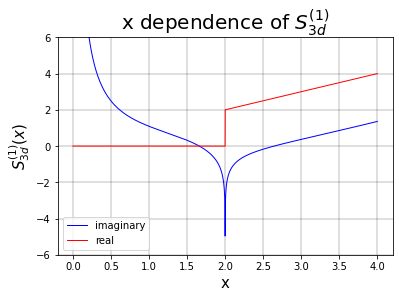

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt 
x = np.linspace(0.0,4.0,10000) 
plt.ylim([-6,6])
y_imaginary= (12-5*x**2+3*x**2*np.log(abs(x**2-4)))/(3*x*np.pi)
y_real=x*np.sign(x)*np.heaviside(x-2,0)
plt.rcParams["figure.figsize"] = (8, 6)
plt.plot(x,y_imaginary,'b',label='imaginary',linewidth=1)
plt.plot(x,y_real,'r',label='real',linewidth=1) 
plt.xlabel('x',fontsize=15)
plt.ylabel(r'$S^{(1)}_{3d}(x)$',fontsize=15)
plt.title(r'x dependence of $S^{(1)}_{3d}$',fontsize=20)
plt.grid(color='k',linestyle='-',linewidth=0.25)
plt.legend()
plt.show()  

where as 
$$ Re[S^{(1);xx}_{3d}] = xsgn(x)\theta(x-2) $$
$$ Im[S^{(1);xx}_{3d}] = \frac{1}{\pi}\frac{12-5x^{2}+3x^{2}\ln|x^{2}-4|}{3x}$$
Here $ x = \frac{\hbar w}{|\mu|}$ .So, $x\ltimes w$ and the singularity is at $x=2$ $\Rightarrow$ when $\hbar w=2|\mu$|

**Third harmonic generation**

The third order conductivity for THG implies 
$$\sigma^{(3);xxyy}_{3d}=\sigma^{(3);xyxy}_{3d}=\sigma^{(3);xyyx}_{3d}=\frac{\sigma^{(3);xxxx}_{3d}}{3}$$
We already know
$$\sigma^{(3);xxyy}_{3d}(|\mu|;w,w,w)= \frac{v_{F}e^{4}}{16\pi^{2}|\mu|^{3}}S^{(3);d}_{3d}(\frac{\hbar w}{|\mu|},\frac{\hbar w}{|\mu|},\frac{\hbar w}{|\mu|})$$
The $S^{(3);xxyy}_{3d}(x,x,x)$ term can be written as 
$$S^{(3);xxyy}_{3d}(x,x,x) = \frac{2i}{135x^{3}}[12-5\tau(x)+32\tau(2x)-27\tau(3x)]$$
Each T term is associated with one optical transition involving photon energies just like as the expression for the response tensor describing THG in graphene.
$S^{(3);xxyy}_{3d}(x,x,x)$ varies with $x$ as...(will be found by the below code)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


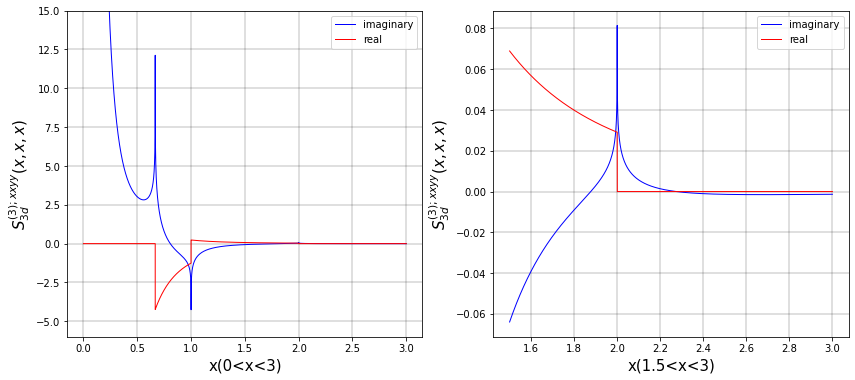

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt 
plt.figure(figsize=(14,6))
x = np.linspace(0.0,3,20000) 
x1= np.linspace(1.5,3.0,20000)
def y_imaginary(x):
    return 2*(12-5*np.log(abs(x**2-4))+32*np.log(abs(4*x**2-4))-27*np.log(abs(9*x**2-4)))/(135*x**3)
def y_real(x):
    return 2*np.pi*np.sign(x)*(-5*np.heaviside(abs(x)-2,0)+32*np.heaviside(2*abs(x)-2,0)-27*np.heaviside(3*abs(x)-2,0))/(135*x**3)
plt.subplot(121)
plt.plot(x,y_imaginary(x),'b',label='imaginary',linewidth=1) 
plt.plot(x,y_real(x),'r',label='real',linewidth=1)
plt.ylim([-6,15])
plt.xlabel('x(0<x<3)',fontsize=15)
plt.ylabel(r'$S^{(3);xxyy}_{3d}(x,x,x)$',fontsize=15)
plt.grid(color='k',linestyle='-',linewidth=0.25)
plt.legend()
plt.subplot(122)
plt.plot(x1,y_imaginary(x1),'b',label='imaginary',linewidth=1)
plt.plot(x1,y_real(x1),'r',label='real',linewidth=1)
plt.xlabel('x(1.5<x<3)',fontsize=15)
plt.ylabel(r'$S^{(3);xxyy}_{3d}(x,x,x)$',fontsize=15)
plt.grid(color='k',linestyle='-',linewidth=0.25)
plt.legend()
plt.show()  

Here $x=\frac{\hbar w}{|\mu|}$. where as
$$ Re[S^{(3);xxyy}_{3d}(x,x,x)] = \frac{2\pi sgn(x)}{135x^{3}}[-5\theta(|x|-2)+32\theta(2|x|-2)-27\theta(3|x|-2)]$$
$$ Im[S^{(3);xxyy}_{3d}(x,x,x)] = \frac{2}{135x^{3}}[12-5\ln|x^{2}-4|+32\ln|4x^{2}-4|-27\ln|9x^{2}-4|]$$
$  Re[S^{(3);xxyy}_{3d}(x,x,x)]=0$ for $x>2$ implies complete cancellation due to the interference. In the limit of $\mu\rightarrow 0$ which also corresponds to $x\rightarrow \infty $, clearly real part is zero as said above, so, imaginary part would be $$\sigma^{(3);xxyy}_{3d}(w,w,w)|_{\mu=0}=i\frac{v_{F}e^{4}(6+32\ln 2-27\ln 3)}{540\pi^{2}(\hbar w)^{3}}$$
So, now if we compare our results with those found in velocity guage using floqet states , at zero temperature, real part of their result in one dirac cone is 
$$ Re[S^{(3);xxyy}_{3d}(x,x,x)]_{lit} = \frac{2\pi sgn(x)}{135x^{3}}[-4\theta(|x|-2)+16\theta(2|x|-2)-27\theta(3|x|-2)]$$
We can see the first two terms are different from what we have found.This difference could be due to the choice of velocity or length guage.

**The Kerr effect and the two photon absorption**

Another non linear response is about correcting linear response considering Kerr effect and the two photon absorption that can be described by tensor $ \sigma^{(3);dabc}_{3d}(-w,w,w)$. Because for the frequency set (-w,w,w) there exists only 2 independent components $ \sigma^{(3);xxyy}_{3d}(-w,w,w)$ and $ \sigma^{(3);xyyx}_{3d}(-w,w,w)=\sigma^{(3);xyxy}_{3d}(-w,w,w)$. So consequentially the intraband divergences that exist for this third order conductivity can be illustrated by

$$\begin{bmatrix} S^{(3);xyxy}_{3d}(-x,x+\delta_{1},x+\delta_{2}) \\  S^{(3);xxyy}_{3d}(-x,x+\delta_{1},x+\delta_{2}) \end{bmatrix}=\frac{4\pi sgn(x)\theta(x^{2}-4)}{45w}B_{d}(x,\delta_{1},\delta_{2})+B_{n}(x)+... $$
where as function B_{d} is given by

$$ B_{d}(x;\delta_{1},\delta_{2})=\frac{\begin{bmatrix} -3\\2 \end{bmatrix}}{\delta_{1}\delta{2}}+\frac{\begin{bmatrix} -4x+3\delta_{2}\\-(x+2\delta_{2}) \end{bmatrix}}{\delta_{1}(x+\delta_{2})(2x+\delta_{2})}+\frac{\begin{bmatrix} -9x+3\delta_{1}\\-(x+2\delta_{1}) \end{bmatrix}}{\delta_{2}(x+\delta_{1})(2x+\delta_{1})}$$
ans $B_{n}$ is given by

$$ \frac{1}{90x^{3}}(\begin{bmatrix} -31\\14 \end{bmatrix}\tau(x)+\begin{bmatrix} -65\\50 \end{bmatrix}\tau(x)+\begin{bmatrix} 96\\-64 \end{bmatrix}\tau(2x)+x\begin{bmatrix} -52\\8 \end{bmatrix}\frac{\partial\tau(x)}{\partial x}+x^{2}\begin{bmatrix} -12\\8 \end{bmatrix}\frac{\partial^{2}\tau(x)}{\partial^{2}x^{2}}-16\begin{bmatrix} 1\\1 \end{bmatrix})$$

Next one is two photon carrier injection. when one photon absorption is absent(x<2), the two photon absorption can be calculated through $ \xi^{abcd}_{2}=3(\hbar w)^{-1}Re[\sigma^{(3);abcd}(-w,w,w)]$. So it can be written as 

$$\begin{pmatrix} \xi^{xyxy}_{2}(w)\\\xi^{abcd}_{2}(w)\end{pmatrix} = \frac{v_{F}e^{4}}{240\pi|\mu|^{4}}sgn(w)X(\frac{\hbar w}{|\mu|};\frac{\hbar\delta_{1}}{|\mu|},\frac{\hbar\delta_{2}}{|\mu|})$$
where as $$ X(x;\delta_{1},\delta_{2}) = - \frac{4}{x^{2}}A_{d}(x;\delta_{1},\delta_{2})\theta(x^{2}-4)+\frac{1}{x^{4}}\begin{bmatrix} 48\theta(x^{2}-1)-17\theta(x^{2}-4)\\-32\theta(x^{2}-1)+18\theta(x^{2}-4) \end{bmatrix}$$

So, the first term survives only in the presence of one photon absorption $(x>2)$. For $1<x<2 (|\mu|<\hbar w<2|\mu|)$, two photon absorption gives

$$\begin{pmatrix} \xi^{xyxy}_{2}(w)\\ \xi^{abcd}_{2}(w)\end{pmatrix} = \frac{v_{F}e^{4}}{15\pi(\hbar w)^{4}}\begin{pmatrix} 3 \\ -2 \end{pmatrix} $$

In graphene , frequency dependence changes is $w^{-5}$. Here it changed to $w^{-4}$

---



**Parametric Frequency Conversion**

With the help of PFC a laser can be converted to a different colour using nonlinear optical interaction rather than the material properties of the host medium.

The dependence of $x_{S}$ on the spectra, $\quad S_{3d}^{(3);dabc}(-x_{S},x_{P},x_{P})$ for 3D massless Dirac fermions and on $\quad S_{gh}^{(3);dabc}(-x_{S},x_{P},x_{P})$ for graphene is given in the following graphs:

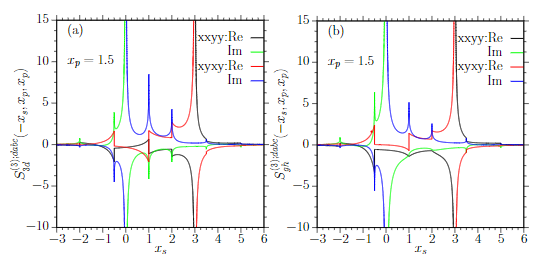

When there are two laser beams, one with pump frequency $\omega_{p}$ and the second with signal frequency $\omega_{s}$, a new frequency $2\omega_{p}-\omega_{s}$ can be genereated through PFC. 

As shown in the illustration we fix $x_{p} = 1.5$. The possible divergences appear at $x_{s} = -2, -0.5, 1,3,3.5$ (interband) and at $x_{s} = 1,2$ (intraband).

All these divergences exist for $\quad S_{3d}^{(3);dabc}$, but the divergences at $x_{s} = 1,2$ are removed from $\quad S_{gh}^{(3);dabc}$.

Both conductivities exhibit similar amplitude and structures. For the intraband divergences, that at $x_{s}=0$ is associated with a field/current induced second harmonic generation, and the other at $x_{s}=2x_{p}$ corresponds to two-color CCI.

Around these two divergences, the conductivities diverge as $\quad x_{s}^{-1}$ around $x_{s} \sim 0$ and $ (x_{s} - 2 x_{p})^{-1}$ around $x_{s} \sim 2x_{p}$.

The spectra diverges much faster around intraband divergences than around interband divergences, where the divergences are logarithmic.

**Two color coherent current injection**

In this phenomenon a quasi-static current can be generated due to the interference of one-photon absorption and two-photon absorption processes. 

The current flow can be described as:

$\frac{d J^{a}(t)}{d t}=\eta_{3 d}^{a b c d}(\omega) E_{-\omega}^{b} E_{-\omega}^{c} E_{2 \omega}^{d}+c . c .$

where 
$\eta_{3 d}^{a b c d}(\omega) = \lim _{\delta \rightarrow 0}\left[-3 i \delta \sigma_{3 d}^{(3) ; a b c d}(-\omega,-\omega, 2 \omega+\delta)\right]$


After solving for the limit at $\omega > 0$, we get,

$\left(\begin{array}{c}\eta_{3 d}^{x x y y}(\omega) \\ \eta_{3 d}^{x y y x}(\omega)\end{array}\right)=\frac{i v_{F} e^{4}}{60 \pi(\hbar \omega)^{2}}\left[\left(\begin{array}{c}-6 \\ 4\end{array}\right) \theta(\hbar \omega-|\mu|)+\left(\begin{array}{c}2 \\ -3\end{array}\right) \theta(\hbar \omega-2|\mu|)\right]$

The two photon absorption $(\omega + \omega)$ and a one-photon absorption $(2\omega)$ induce interference between the transition channels and involves the term $\theta(\hbar\omega - 2|\mu|)$.

The other term (the second one) involving $\theta(\hbar\omega - 2|\mu|)$ is associated with the interference of stimulated electronic Raman scattering (for photon freqencies of $2\omega$ and $-\omega$) and one-photon absorption $(\omega)$.

Compared to the injection in graphene, the injection coefficients in 3D massless DFs are proportional to $(\hbar\omega)^{-2}$ instead of $(\hbar\omega)^{-3}$ in graphene.

The relative amplitudes between different components are also different.

### **Summary**
The findings of the paper have been focussed in three sections.      

In Section 2, the conductivities of 2 dimensional Dirac fermions have been presented followed by the discussion of the symmetries in 2D massive dirac fermions and conductivities in graphene.

$$
H_{2 d}(\kappa, \Delta)=\hbar v_{F} \kappa \cdot \sigma+\Delta \sigma_{z}
$$



*   It is invariant with respect to rotational symmetry indicating only two independent components of linear conductivity, i.e. the diagonal component $\sigma_{2 d}^{(1) ; x x}$ and the off diagonal component $\sigma_{2 d}^{(1) ; x y}$. From these all the other components were found utilising the symmetry of the hamiltonian. $U_{\theta} H_{2 d}\left(R_{\theta} \kappa, \Delta\right) U_{\theta}^{\dagger}=H_{2 d}(\kappa, \Delta)$
*   $\sigma_{2 d}^{(3) ; x x x x}=\sigma_{2 d}^{(3) ; y y y y}, \quad \sigma_{2 d}^{(3) ; y x x x}=-\sigma_{2 d}^{(3) ; x y y y}$
$\sigma_{2 d}^{(3) ; x x y y}=\sigma_{2 d}^{(3) ; y y x x}, \quad \sigma_{2 d}^{(3) ; y x y y}=-\sigma_{2 d}^{(3) ; x y x x}$
$\sigma_{2 d}^{(3) ; x y x y}=\sigma_{2 d}^{(3) ; y x y x}, \quad \sigma_{2 d}^{(3) ; y y x y}=-\sigma_{2 d}^{(3) ; x x y x}$
$\sigma_{2 d}^{(3) ; x y y x}=\sigma_{2 d}^{(3) ; y x x y}, \quad \sigma_{2 d}^{(3) ; y y y x}=-\sigma_{2 d}^{(3) ; x x x y}$
*    Also because of inversion symmetry, the second order response cancels out.
*   Finally, all symmetric components were found to be even function of $\Delta$.

$$
H_{g g ; \tau}(\boldsymbol{\kappa}, \Delta)=\hbar v_{F}\left(\tau \kappa_{y} \sigma_{x}-\kappa_{x} \sigma_{y}\right)+\Delta \sigma_{z}
$$

*    Graphene too is rotationally invariant but the antisymmetric components follow $\quad \sigma_{gg;\tau}^{(n);da...} (\Delta) = \tau\quad\sigma_{2d}^{(1);da...} (\Delta)$. Hence for gapped graphene only the symmetric components survive. They are given as follows:
$\sigma_{g g}^{(1) ; x x}(\omega)=2 \sum_{\tau} \sigma_{g g ; \tau}^{(1) ; x x}(\omega)=4 \sigma_{2 d}^{(1) ; x x}(\omega)$

*    The linear conductivity for graphene:
$\sigma_{g g}^{(1) ; x x}(\omega)=\frac{i \sigma_{0}}{\pi}\left[\frac{4 E_{c}}{\hbar \omega}-\frac{4 \Delta^{2}+(\hbar \omega)^{2}}{(\hbar \omega)^{2}} \mathcal{G}\left(E_{c} ; \hbar \omega\right)\right]$
where 
$\mathcal{G}\left(E_{c} ; \hbar \omega\right)=\ln \left|\frac{\hbar \omega+2 E_{c}}{\hbar \omega-2 E_{c}}\right|+i \pi \theta\left(|\hbar \omega|-2 E_{c}\right)$                              
and the effecective gap parameter, $E_{c} = max\{|\Delta|,|\mu|\}$
*    The third order conductivity is then given as:
$\begin{aligned}\left(i \sigma_{3}\right)^{-1} \sigma_{g g}^{(3) ; x x y y}\left(\omega_{1}, \omega_{2}, \omega_{3}\right) &=F_{1}\left(\Delta ; \hbar \omega_{1}, \hbar \omega_{2}, \hbar \omega_{3}\right) \mathcal{G}\left(E_{c} ; \hbar\left(\omega_{1}+\omega_{2}+\omega_{3}\right)\right) \\ &+F_{2}\left(\Delta ; \hbar \omega_{1}, \hbar \omega_{2}, \hbar \omega_{3}\right) \mathcal{G}\left(E_{c} ; \hbar\left(\omega_{2}+\omega_{3}\right)\right) \\ &+F_{3}\left(\Delta ; \hbar \omega_{1}, \hbar \omega_{2}, \hbar \omega_{3}\right) \mathcal{G}\left(E_{c} ; \hbar\left(\omega_{1}+\omega_{3}\right)\right) \\ &+F_{3}\left(\Delta ; \hbar \omega_{1}, \hbar \omega_{3}, \hbar \omega_{2}\right) \mathcal{G}\left(E_{c} ; \hbar\left(\omega_{1}+\omega_{2}\right)\right) \\ &+F_{4}\left(\Delta ; \hbar \omega_{1}, \hbar \omega_{2}, \hbar \omega_{3}\right) \mathcal{G}\left(E_{c} ; \hbar \omega_{1}\right) \\ &+F_{5}\left(\Delta ; \hbar \omega_{1}, \hbar \omega_{2}, \hbar \omega_{3}\right) \mathcal{G}\left(E_{c} ; \hbar \omega_{2}\right) \\ &+F_{5}\left(\Delta ; \hbar \omega_{1}, \hbar \omega_{3}, \hbar \omega_{2}\right) \mathcal{G}\left(E_{c} ; \hbar \omega_{3}\right) \end{aligned}$
where 
$F_{i}\left(\Delta ; \epsilon_{1}, \epsilon_{2}, \epsilon_{3}\right)=\mathcal{F}_{i 0}\left(\epsilon_{1}, \epsilon_{2}, \epsilon_{3}\right)+\Delta^{2} \mathcal{F}_{i 2}\left(\epsilon_{1}, \epsilon_{2}, \epsilon_{3}\right)+\Delta^{4} \mathcal{F}_{i 4}\left(\epsilon_{1}, \epsilon_{2}, \epsilon_{3}\right)$


Then in Section 3, the linear and third order conductivities for 3D massless dirac fermions were presented.
*    For a 3D massless Dirac Fermion in a single isotropic cone the Hamiltonian is found out to be:
$ H_{3d}(\textbf{k}) = \hbar v_{F}\textbf{k}.\sigma $
*    As this hamiltonian is spherically symmetric the only independent non-zero component of the linear conductivity is 
$\quad \sigma_{3d}^{(1);xx}(\omega)$.
*    Taking the response of massless 3D DFs to be equivalent to an ensemble of responses of 2D massive DFs with different gap parameters, we find the linear conductivity as follows:

$\begin{aligned} \sigma_{3 d}^{(1) ; x x} &=\int \frac{d k_{z}}{2 \pi} \sigma_{2 d}^{(1) ; x x}\left(\hbar v_{F} k_{z}\right)=\frac{1}{\pi \hbar v_{F}} \int_{0}^{\infty} d \Delta \sigma_{2 d}^{(1) ; x x}(\Delta) \\ &=\frac{1}{4 \pi \hbar v_{F}} \int_{0}^{\infty} d \Delta \sigma_{g g}^{(1) ; x x}(\Delta) \end{aligned}$

*    Similarly the third order conductivity is given as:

$\sigma_{3 d}^{(3) ; x x y y}=\frac{1}{4 \pi \hbar v_{F}} \int_{0}^{\infty} d \Delta \sigma_{g g}^{(3) ; x x y y}(\Delta)$

In section 4, the conductivities for different optical phenomenon including the linear optical response, THG,the Kerr effect and twophoton carrier injection, PFC, and two-color CCI were presented.

Following conclusions were drawn from the comparison between 2D and 3D Dirac fermions:


1.   The dependence on the Fermi velocity $v_{F}$ changes from $\quad v_{n−1}^{F}$in 2D to $\quad v_{n−2}^{F}$ in 3D for the nth order conductivity.
2.   The chemical potential dependence of the third order conductivity changes from $μ^{−1}$ to $μ^{0}$ for a lightly doped sample.
3.   The frequency dependence of the two photon carrier injection changes from $\omega^{-5}$ to $\omega^{−4}$.
4.    The frequency dependence of two color current injection changes from $\omega^{-3}$ to $\omega^{−2}$.
5.    For nonzero chemical potential, bothfrequency spectra show very similar structures in general, but their amplitude can differ upto two order of magnitude.




### **Endsem problem:**

Derive the expression for  $Re[\sigma_{3d}^{(1);xx}]$ to prove it is proportional to $\omega$, given $\sigma_{gg}^{(1);xx}(\omega) = \frac{i\sigma_0}{\pi}[\frac{4E_c}{\hbar \omega} - \frac{(4\Delta^2 + (\hbar\omega)^2)G(E_c;\hbar\omega)}{(\hbar\omega)^2}]$

Here, $\sigma_0 = \frac{e^2}{4\hbar}$ and $E_c = max({|\Delta|,|\mu|})$ = effective gap parameter and 

$G(E_c;\hbar\omega) = \ln(|\frac{\hbar\omega + 2E_c}{\hbar\omega - 2E_c}|) + i\pi\theta(|\hbar\omega| - 2E_c)$

where $\theta(x)$ is the step function,
consider realistic band dispersion with cut-off energy $E_A$ 

### **References**

[1] "Third order optical nonlinearity of three dimensional massless
Dirac fermions" - Cheng et al, 2020. 

[2] http://www.physics.rutgers.edu/pythtb/

[3] https://en.wikipedia.org/wiki/Dirac_equation

[4] "Intraband divergences in third order optical response of 2D system" - Cheng et al, 2019